In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.04G/1.06G [00:09<00:00, 164MB/s]
100% 1.06G/1.06G [00:09<00:00, 117MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [5]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [7]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 80s 103ms/step - loss: 1.0709 - accuracy: 0.6140 - val_loss: 0.6937 - val_accuracy: 0.6384
Epoch 2/10
625/625 [==============================] - 65s 103ms/step - loss: 0.5584 - accuracy: 0.7175 - val_loss: 0.5449 - val_accuracy: 0.7158
Epoch 3/10
625/625 [==============================] - 66s 104ms/step - loss: 0.4766 - accuracy: 0.7739 - val_loss: 0.5090 - val_accuracy: 0.7420
Epoch 4/10
625/625 [==============================] - 66s 105ms/step - loss: 0.4200 - accuracy: 0.8075 - val_loss: 0.4847 - val_accuracy: 0.7534
Epoch 5/10
625/625 [==============================] - 65s 104ms/step - loss: 0.3535 - accuracy: 0.8447 - val_loss: 0.4817 - val_accuracy: 0.7814
Epoch 6/10
625/625 [==============================] - 65s 103ms/step - loss: 0.2621 - accuracy: 0.8863 - val_loss: 0.5249 - val_accuracy: 0.7858
Epoch 7/10
625/625 [==============================] - 67s 106ms/step - loss: 0.1901 - accuracy: 0.9235 - val_loss: 0.5487 - val_ac

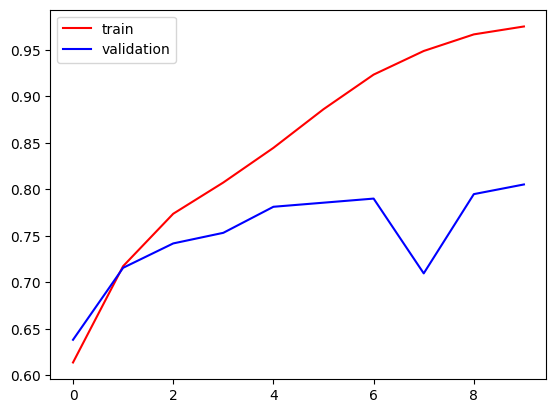

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [55]:
# Save the model
model.save('content/image_classification_model.h5')

# Load the saved model
loaded_model = tf.keras.models.load_model('content/image_classification_model.h5')


In [56]:
import cv2

In [57]:
test_img = cv2.imread('/content/dog.jpg')



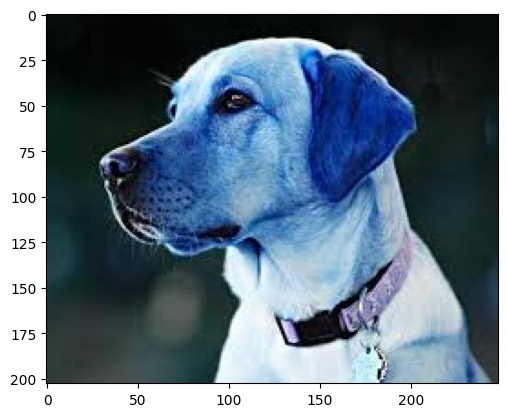

In [58]:
plt.imshow(test_img)

In [62]:
test_img.shape

(256, 256, 3)

In [63]:
test_img = cv2.resize(test_img,(256,256))

In [64]:
test_input = test_img.reshape((1,256,256,3))

In [67]:
prediction=loaded_model.predict(test_input)
print(prediction)

1/1 [==============================] - 0s 21ms/step
[[1.]]
